# <font color='brown'>Pandas 百题大冲关</font>

---


Pandas 是基于 NumPy 的一种数据处理工具，该工具为了解决数据分析任务而创建。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。  

Pandas 的数据结构：Pandas 主要有 Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）等数据结构。其中 Series 和 DataFrame 应用的最为广泛。
- Series 是一维带标签的数组，它可以包含任何数据类型。包括整数，字符串，浮点数，Python 对象等。Series 可以通过标签来定位。
- DataFrame 是二维的带标签的数据结构。我们可以通过标签来定位数据。这是 NumPy 所没有的。

**Pandas 百题大冲关**分为基础篇和进阶篇，每部分各有 50 道练习题。基础部分的练习题在于熟悉 Pandas 常用方法的使用，而进阶部分则侧重于 Pandas 方法的组合应用。

如果你在学习课程之前已经有 Pandas 使用基础，那么可以对照着单元格复习一遍。如果你对 Pandas 并不熟练，就一定要<font color='brown'>亲自动手</font>在每个示例单元格下方的空白单元格中练习。

### 实验知识点
本次实验涉及的知识点主要有：
- 创建Series
- Series基本操作
- 创建DataFrame
- DataFrame基本操作
- DataFrame文件操作
- Series，DataFrame和多索引
- 透视表
- 数据清洗
- 数据预处理
- 可视化

### 实验环境

- Python 3.6
- NumPy
- Pandas

### 目录索引

- <a href="#基础部分">基础部分</a>
- <a href="#进阶部分">进阶部分</a>
- <a href="#实验总结">实验总结</a>

___

## 基础部分

### 导入 Pandas 模块

#### 导入 Pandas
练习 Pandas 之前，首先需要导入 Pandas 模块，并约定简称为 `pd`。

In [2]:
import pandas as pd

#### 查看 Pandas 版本信息

In [3]:
print(pd.__version__)

0.23.4


### 创建 Series 数据类型

Pandas 中，Series 可以被看作由 1 列数据组成的数据集。

创建 Series 语法：`s = pd.Series(data, index=index)`，可以通过多种方式进行创建，以下介绍了 3 个常用方法。

#### 从列表创建 Series

In [4]:
arr = [0, 1, 2, 3, 4]
s1 = pd.Series(arr)  # 如果不指定索引，则默认从 0 开始
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

#### 从 Ndarray 创建 Series

In [5]:
import numpy as np
n = np.random.randn(5)  # 创建一个随机 Ndarray 数组

index = ['a', 'b', 'c', 'd', 'e']
s2 = pd.Series(n, index=index)
s2

a    1.454661
b    0.121631
c    0.519351
d   -1.700479
e   -1.329693
dtype: float64

#### 从字典创建 Series

In [6]:
d = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
s3 = pd.Series(d)
s3

a    1
b    2
c    3
d    4
e    5
dtype: int64

### Series 基本操作

#### 修改 Series 索引

In [7]:
print(s1)  # 以 s1 为例

0    0
1    1
2    2
3    3
4    4
dtype: int64


In [8]:
s1.index = ['A', 'B', 'C', 'D', 'E']  # 修改后的索引
s1

A    0
B    1
C    2
D    3
E    4
dtype: int64

#### Series 纵向拼接

In [9]:
s4 = s3.append(s1)  # 将 s1 拼接到 s3
s4

a    1
b    2
c    3
d    4
e    5
A    0
B    1
C    2
D    3
E    4
dtype: int64

#### Series 按指定索引删除元素

In [10]:
print(s4)
s4 = s4.drop('e')  # 删除索引为 e 的值
s4

a    1
b    2
c    3
d    4
e    5
A    0
B    1
C    2
D    3
E    4
dtype: int64


a    1
b    2
c    3
d    4
A    0
B    1
C    2
D    3
E    4
dtype: int64

#### Series 修改指定索引元素

In [11]:
s4['A'] = 6  # 修改索引为 A 的值 = 6
s4

a    1
b    2
c    3
d    4
A    6
B    1
C    2
D    3
E    4
dtype: int64

#### Series 按指定索引查找元素

In [12]:
s4['B']

1

#### Series 切片操作
例如对`s4`的前 3 个数据访问

In [13]:
s4[:3]

a    1
b    2
c    3
dtype: int64

### Series 运算

#### Series 加法运算
Series 的加法运算是按照索引计算，如果索引不同则填充为 `NaN`（空值）。

In [14]:
s4.add(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    2.0
b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64

#### Series 减法运算
Series的减法运算是按照索引对应计算，如果不同则填充为 `NaN`（空值）。

In [15]:
s4.sub(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    0.0
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

#### Series 乘法运算
Series 的乘法运算是按照索引对应计算，如果索引不同则填充为 `NaN`（空值）。

In [16]:
s4.mul(s3)

A     NaN
B     NaN
C     NaN
D     NaN
E     NaN
a     1.0
b     4.0
c     9.0
d    16.0
e     NaN
dtype: float64

#### Series 除法运算
Series 的除法运算是按照索引对应计算，如果索引不同则填充为 `NaN`（空值）。

In [17]:
s4.div(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    1.0
b    1.0
c    1.0
d    1.0
e    NaN
dtype: float64

####  Series 求中位数

In [18]:
s4.median()

3.0

####  Series 求和

In [19]:
s4.sum()

26

#### Series 求最大值

In [20]:
s4.max()

6

#### Series 求最小值

In [21]:
s4.min()

1

### 创建 DataFrame 数据类型

与 Sereis 不同，DataFrame 可以存在多列数据。一般情况下，DataFrame 也更加常用。

#### 通过 NumPy 数组创建 DataFrame

In [22]:
dates = pd.date_range('today', periods=6)  # 定义时间序列作为 index
num_arr = np.random.randn(6, 4)  # 传入 numpy 随机数组
columns = ['A', 'B', 'C', 'D']  # 将列表作为列名
df1 = pd.DataFrame(num_arr, index=dates, columns=columns)
df1

,A,B,C,D
2019-04-03 19:07:00.264401,0.359100,0.416029,0.881810,0.081304
2019-04-04 19:07:00.264401,-1.391953,-0.377013,-0.822985,-1.406640
2019-04-05 19:07:00.264401,-0.854495,-1.131710,0.799381,2.212470
2019-04-06 19:07:00.264401,-0.475494,-1.152197,-1.354688,-0.845845
2019-04-07 19:07:00.264401,1.543848,-0.077134,1.936559,-0.971330
2019-04-08 19:07:00.264401,-0.293936,-0.786213,0.219731,-0.092208


#### 通过字典数组创建 DataFrame

In [23]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df2 = pd.DataFrame(data, index=labels)
df2

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### 查看 DataFrame 的数据类型

In [24]:
df2.dtypes

animal       object
age         float64
visits        int64
priority     object
dtype: object

### DataFrame 基本操作

#### 23. 预览 DataFrame 的前 5 行数据

此方法对快速了解陌生数据集结构十分有用。

In [25]:
df2.head()  # 默认为显示 5 行，可根据需要在括号中填入希望预览的行数

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no


#### 查看 DataFrame 的后 3 行数据

In [26]:
df2.tail(3)

,animal,age,visits,priority
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### 查看 DataFrame 的索引

In [27]:
df2.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

#### 查看 DataFrame 的列名

In [28]:
df2.columns

Index(['animal', 'age', 'visits', 'priority'], dtype='object')

#### 查看 DataFrame 的数值

In [29]:
df2.values

array([['cat', 2.5, 1, 'yes'],
       ['cat', 3.0, 3, 'yes'],
       ['snake', 0.5, 2, 'no'],
       ['dog', nan, 3, 'yes'],
       ['dog', 5.0, 2, 'no'],
       ['cat', 2.0, 3, 'no'],
       ['snake', 4.5, 1, 'no'],
       ['cat', nan, 1, 'yes'],
       ['dog', 7.0, 2, 'no'],
       ['dog', 3.0, 1, 'no']], dtype=object)

#### 查看 DataFrame 的统计数据

In [30]:
df2.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


#### DataFrame 转置操作

In [31]:
df2.T

,a,b,c,d,e,f,g,h,i,j
animal,cat,cat,snake,dog,dog,cat,snake,cat,dog,dog
age,2.5,3,0.5,NaN,5,2,4.5,NaN,7,3
visits,1,3,2,3,2,3,1,1,2,1
priority,yes,yes,no,yes,no,no,no,yes,no,no


#### 对 DataFrame 进行按列排序

In [32]:
df2.sort_values(by='age')  # 按 age 升序排列

,animal,age,visits,priority
c,snake,0.5,2,no
f,cat,2.0,3,no
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no
g,snake,4.5,1,no
e,dog,5.0,2,no
i,dog,7.0,2,no
d,dog,NaN,3,yes
h,cat,NaN,1,yes


#### 对 DataFrame 数据切片

In [33]:
df2[1:3]

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


#### 对 DataFrame 通过标签查询（单列）

In [34]:
df2['age']

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

In [35]:
df2.age  # 等价于 df2['age']

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

#### 对 DataFrame 通过标签查询（多列）

In [36]:
df2[['age', 'animal']]  # 传入一个列名组成的列表

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


#### 对 DataFrame 通过位置查询

In [37]:
df2.iloc[1:3]  # 查询 2，3 行

,animal,age,visits,priority
b,cat,3.0,3,yes
c,snake,0.5,2,no


#### ataFrame 副本拷贝

In [38]:
# 生成 DataFrame 副本，方便数据集被多个不同流程使用
df3 = df2.copy()
df3

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


#### 判断 DataFrame 元素是否为空

In [39]:
df3.isnull()  # 如果为空则返回为 True

,animal,age,visits,priority
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,False,True,False,False
e,False,False,False,False
f,False,False,False,False
g,False,False,False,False
h,False,True,False,False
i,False,False,False,False
j,False,False,False,False


#### 添加列数据

In [40]:
num = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], index=df3.index)

df3['No.'] = num  # 添加以 'No.' 为列名的新数据列
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,cat,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,2.0,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 根据 DataFrame 的下标值进行更改。

In [41]:
# 修改第 2 行与第 1 列对应的值 3.0 → 2.0
df3.iat[1, 0] = 2  # 索引序号从 0 开始，这里为 1, 0
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,2.0,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


#### 根据 DataFrame 的标签对数据进行修改

In [42]:
df3.loc['f', 'age'] = 1.5
df3

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


####  DataFrame 求平均值操作

In [43]:
df3.mean()

age       3.375
visits    1.900
No.       4.500
dtype: float64

####  对 DataFrame 中任意列做求和操作

In [44]:
df3['visits'].sum()

19

### 字符串操作

####  将字符串转化为小写字母

In [45]:
string = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca',
                    np.nan, 'CABA', 'dog', 'cat'])
print(string)
string.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### 将字符串转化为大写字母

In [46]:
string.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

### DataFrame 缺失值操作

####  对缺失值进行填充

In [47]:
df4 = df3.copy()
print(df4)
df4.fillna(value=3)

  animal  age  visits priority  No.
a    cat  2.5       1      yes    0
b      2  3.0       3      yes    1
c  snake  0.5       2       no    2
d    dog  NaN       3      yes    3
e    dog  5.0       2       no    4
f    cat  1.5       3       no    5
g  snake  4.5       1       no    6
h    cat  NaN       1      yes    7
i    dog  7.0       2       no    8
j    dog  3.0       1       no    9


,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,3.0,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,3.0,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


####  删除存在缺失值的行

In [48]:
df5 = df3.copy()
print(df5)
df5.dropna(how='any')  # 任何存在 NaN 的行都将被删除

  animal  age  visits priority  No.
a    cat  2.5       1      yes    0
b      2  3.0       3      yes    1
c  snake  0.5       2       no    2
d    dog  NaN       3      yes    3
e    dog  5.0       2       no    4
f    cat  1.5       3       no    5
g  snake  4.5       1       no    6
h    cat  NaN       1      yes    7
i    dog  7.0       2       no    8
j    dog  3.0       1       no    9


,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


####  DataFrame 按指定列对齐

In [49]:
left = pd.DataFrame({'key': ['foo1', 'foo2'], 'one': [1, 2]})
right = pd.DataFrame({'key': ['foo2', 'foo3'], 'two': [4, 5]})

print(left)
print(right)

    key  one
0  foo1    1
1  foo2    2
    key  two
0  foo2    4
1  foo3    5


In [50]:
# 按照 key 列对齐连接，只存在 foo2 相同，所以最后变成一行
pd.merge(left, right, on='key')

,key,one,two
0,foo2,2,4


### DataFrame 文件操作

####  CSV 文件写入

In [51]:
df3.to_csv('animal.csv')
print("写入成功.")

写入成功.


####  CSV 文件读取

In [52]:
df_animal = pd.read_csv('animal.csv')
df_animal

,Unnamed: 0,animal,age,visits,priority,No.
0,a,cat,2.5,1,yes,0
1,b,2,3.0,3,yes,1
2,c,snake,0.5,2,no,2
3,d,dog,NaN,3,yes,3
4,e,dog,5.0,2,no,4
5,f,cat,1.5,3,no,5
6,g,snake,4.5,1,no,6
7,h,cat,NaN,1,yes,7
8,i,dog,7.0,2,no,8
9,j,dog,3.0,1,no,9


####  Excel 写入操作

In [53]:
df3.to_excel('animal.xlsx', sheet_name='Sheet1')
print("写入成功.")

写入成功.


####  Excel 读取操作

In [54]:
pd.read_excel('animal.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
b,2,3.0,3,yes,1
c,snake,0.5,2,no,2
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
g,snake,4.5,1,no,6
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


---

## 进阶部分

### 时间序列索引

####  建立一个以 2018 年每一天为索引，值为随机数的 Series

In [55]:
dti = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2018-01-01    0.109191
2018-01-02    0.628531
2018-01-03    0.619115
2018-01-04    0.564567
2018-01-05    0.403191
2018-01-06    0.524557
2018-01-07    0.683705
2018-01-08    0.845139
2018-01-09    0.162537
2018-01-10    0.277047
2018-01-11    0.383146
2018-01-12    0.076518
2018-01-13    0.896850
2018-01-14    0.441789
2018-01-15    0.908018
2018-01-16    0.237412
2018-01-17    0.361724
2018-01-18    0.842275
2018-01-19    0.097355
2018-01-20    0.372699
2018-01-21    0.184193
2018-01-22    0.326364
2018-01-23    0.076707
2018-01-24    0.117031
2018-01-25    0.814909
2018-01-26    0.223831
2018-01-27    0.952258
2018-01-28    0.183732
2018-01-29    0.647071
2018-01-30    0.031928
                ...   
2018-12-02    0.173665
2018-12-03    0.853164
2018-12-04    0.025080
2018-12-05    0.987516
2018-12-06    0.768131
2018-12-07    0.552354
2018-12-08    0.939172
2018-12-09    0.336882
2018-12-10    0.812747
2018-12-11    0.522742
2018-12-12    0.332285
2018-12-13    0.244316
2018-12-14 

####  统计`s` 中每一个周三对应值的和

In [56]:
# 周一从 0 开始
s[s.index.weekday == 2].sum()

30.5118963890555

####  统计`s`中每个月值的平均值

In [57]:
s.resample('M').mean()

2018-01-31    0.450364
2018-02-28    0.513718
2018-03-31    0.566958
2018-04-30    0.468583
2018-05-31    0.464479
2018-06-30    0.509609
2018-07-31    0.531288
2018-08-31    0.479541
2018-09-30    0.471408
2018-10-31    0.571421
2018-11-30    0.430884
2018-12-31    0.468745
Freq: M, dtype: float64

####  将 Series 中的时间进行转换（秒转分钟）

In [58]:
s = pd.date_range('today', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(s)), index=s)

ts.resample('Min').sum()

2019-04-03 19:07:00    11940
2019-04-03 19:08:00    12708
Freq: T, dtype: int32

####  UTC 世界时间标准

In [59]:
s = pd.date_range('today', periods=1, freq='D')  # 获取当前时间
ts = pd.Series(np.random.randn(len(s)), s)  # 随机数值
ts_utc = ts.tz_localize('UTC')  # 转换为 UTC 时间
ts_utc

2019-04-03 19:07:14.358401+00:00    1.201902
Freq: D, dtype: float64

####  转换为上海所在时区

In [60]:
ts_utc.tz_convert('Asia/Shanghai')

# 看一看你当前的时间，是不是一致？

2019-04-04 03:07:14.358401+08:00    1.201902
Freq: D, dtype: float64

#### 不同时间表示方式的转换

In [61]:
rng = pd.date_range('1/1/2018', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2018-01-31   -0.111252
2018-02-28    0.108069
2018-03-31   -1.091720
2018-04-30    0.961539
2018-05-31    1.655160
Freq: M, dtype: float64
2018-01   -0.111252
2018-02    0.108069
2018-03   -1.091720
2018-04    0.961539
2018-05    1.655160
Freq: M, dtype: float64


2018-01-01   -0.111252
2018-02-01    0.108069
2018-03-01   -1.091720
2018-04-01    0.961539
2018-05-01    1.655160
Freq: MS, dtype: float64

### Series 多重索引 [选学]

####  创建多重索引 Series

In [62]:
# 构建一个 `letters = ['A', 'B', 'C']` 和 `numbers = list(range(10))`为索引，值为随机数的多重索引 Series。

letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])  # 设置多重索引
s = pd.Series(np.random.rand(30), index=mi)  # 随机数
s

A  0    0.400465
   1    0.109152
   2    0.575190
   3    0.610355
   4    0.486124
   5    0.097926
   6    0.905460
   7    0.912908
   8    0.468154
   9    0.296523
B  0    0.709822
   1    0.647330
   2    0.835570
   3    0.266653
   4    0.830664
   5    0.747947
   6    0.921815
   7    0.188525
   8    0.429289
   9    0.680550
C  0    0.562529
   1    0.455387
   2    0.422889
   3    0.157167
   4    0.378460
   5    0.550385
   6    0.779743
   7    0.853116
   8    0.136615
   9    0.862576
dtype: float64

####  多重索引 Series 查询

In [63]:
# 查询索引为 1，3，6 的值
s.loc[:, [1, 3, 6]]

A  1    0.109152
   3    0.610355
   6    0.905460
B  1    0.647330
   3    0.266653
   6    0.921815
C  1    0.455387
   3    0.157167
   6    0.779743
dtype: float64

####  多重索引 Series 切片

In [64]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.097926
   6    0.905460
   7    0.912908
   8    0.468154
   9    0.296523
B  5    0.747947
   6    0.921815
   7    0.188525
   8    0.429289
   9    0.680550
dtype: float64

### DataFrame 多重索引 [选学]

####  根据多重索引创建 DataFrame
创建一个以 `letters = ['A', 'B']` 和 `numbers = list(range(6))`为索引，值为随机数据的多重索引 DataFrame。

In [65]:
frame = pd.DataFrame(np.arange(12).reshape(6, 2),
                     index=[list('AAABBB'), list('123123')],
                     columns=['hello', 'shiyanlou'])
frame

hello  shiyanlou
A 1      0          1
  2      2          3
  3      4          5
B 1      6          7
  2      8          9
  3     10         11

####  多重索引设置列名称

In [66]:
frame.index.names = ['first', 'second']
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

####  DataFrame 多重索引分组求和

In [67]:
frame.groupby('first').sum()

,hello,shiyanlou
first,,
A,6,9
B,24,27


####  DataFrame 行列名称转换

In [68]:
print(frame)
frame.stack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


first  second           
A      1       hello         0
               shiyanlou     1
       2       hello         2
               shiyanlou     3
       3       hello         4
               shiyanlou     5
B      1       hello         6
               shiyanlou     7
       2       hello         8
               shiyanlou     9
       3       hello        10
               shiyanlou    11
dtype: int32

####  DataFrame 索引转换

In [69]:
print(frame)
frame.unstack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


hello        shiyanlou       
second     1  2   3         1  2   3
first                               
A          0  2   4         1  3   5
B          6  8  10         7  9  11

####  DataFrame 条件查找

In [70]:
# 示例数据

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

In [71]:
# 查找 `age` 大于 `3` 的全部信息

df[df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


####  根据行列索引切片

In [72]:
df.iloc[2:4, 1:3]

,age,visits
c,0.5,2
d,NaN,3


####  DataFrame 多重条件查询
查找 `age<3` 且为 `cat` 的全部数据。

In [73]:
df = pd.DataFrame(data, index=labels)

df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


####  DataFrame 按关键字查询

In [74]:
df3[df3['animal'].isin(['cat', 'dog'])]

,animal,age,visits,priority,No.
a,cat,2.5,1,yes,0
d,dog,NaN,3,yes,3
e,dog,5.0,2,no,4
f,cat,1.5,3,no,5
h,cat,NaN,1,yes,7
i,dog,7.0,2,no,8
j,dog,3.0,1,no,9


####  DataFrame 按标签及列名查询。

In [75]:
df.loc[df2.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


####  DataFrame 多条件排序

按照 `age` 降序，`visits` 升序排列

In [76]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


#### DataFrame 多值替换

将 `priority` 列的 `yes` 值替换为 `True`，`no` 值替换为 `False`。

In [77]:
df['priority'].map({'yes': True, 'no': False})

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

####  DataFrame 分组求和

In [78]:
df4.groupby('animal').sum()

,age,visits,No.
animal,,,
2,3.0,3,1
cat,4.0,5,12
dog,15.0,8,24
snake,5.0,3,8


####  使用列表拼接多个 DataFrame

In [79]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4))  # 生成由随机数组成的 DataFrame 1
temp_df2 = pd.DataFrame(np.random.randn(5, 4))  # 生成由随机数组成的 DataFrame 2
temp_df3 = pd.DataFrame(np.random.randn(5, 4))  # 生成由随机数组成的 DataFrame 3

print(temp_df1)
print(temp_df2)
print(temp_df3)

          0         1         2         3
0  0.795098 -1.620090  1.004215 -0.138486
1  1.382374 -0.205732 -1.888326 -0.990054
2 -0.479345 -0.153234 -0.330651 -0.542631
3 -0.173411  0.280855  2.099851 -0.008386
4  1.082102  0.593573  0.671047  0.736777
          0         1         2         3
0  0.727113 -2.029238 -0.431577 -1.159241
1 -0.784535 -0.331910  0.477050 -0.903691
2 -1.084161  1.858778  0.339213  0.326537
3  1.147723 -0.067497 -0.403673 -0.267836
4 -0.862691 -0.815205  0.847413  0.371263
          0         1         2         3
0 -0.175748  0.555851  2.544154  0.332389
1 -1.543396 -0.667110 -1.390183  0.890227
2  0.131510 -0.895464  0.875780  1.699953
3 -2.243565  2.098984 -0.303709  1.518624
4  0.693398  1.245310 -0.731853 -0.423621


In [80]:
pieces = [temp_df1, temp_df2, temp_df3]
pd.concat(pieces)

,0,1,2,3
0,0.795098,-1.620090,1.004215,-0.138486
1,1.382374,-0.205732,-1.888326,-0.990054
2,-0.479345,-0.153234,-0.330651,-0.542631
3,-0.173411,0.280855,2.099851,-0.008386
4,1.082102,0.593573,0.671047,0.736777
0,0.727113,-2.029238,-0.431577,-1.159241
1,-0.784535,-0.331910,0.477050,-0.903691
2,-1.084161,1.858778,0.339213,0.326537
3,1.147723,-0.067497,-0.403673,-0.267836
4,-0.862691,-0.815205,0.847413,0.371263


####  找出 DataFrame 表中和最小的列

In [81]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df)

          a         b         c         d         e         f         g  \
0  0.830159  0.263841  0.327386  0.622057  0.490561  0.855131  0.633232   
1  0.460826  0.632657  0.884773  0.748427  0.266420  0.313254  0.382571   
2  0.973422  0.544768  0.338204  0.820880  0.153338  0.752697  0.130861   
3  0.422377  0.401157  0.790798  0.039734  0.612696  0.907201  0.375841   
4  0.549594  0.289686  0.388751  0.937120  0.055340  0.067889  0.575737   

          h         i         j  
0  0.311028  0.982727  0.415405  
1  0.056923  0.729066  0.289678  
2  0.959301  0.435336  0.759182  
3  0.187152  0.205678  0.681036  
4  0.064881  0.393548  0.738284  


In [82]:
df.sum().idxmin()  # idxmax(), idxmin() 为 Series 函数返回最大最小值的索引值

'e'

####  DataFrame 中每个元素减去每一行的平均值

In [83]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.sub(df.mean(axis=1), axis=0)

          0         1         2
0  0.997692  0.568003  0.937131
1  0.351633  0.645271  0.754868
2  0.487730  0.126885  0.411522
3  0.118568  0.286376  0.890806
4  0.736491  0.321920  0.031026


,0,1,2
0,0.163416,-0.266272,0.102856
1,-0.232291,0.061347,0.170944
2,0.145685,-0.215161,0.069476
3,-0.313349,-0.145540,0.458889
4,0.373345,-0.041226,-0.332120


####  DataFrame 分组，并得到每一组中最大三个数之和

In [84]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'),
                   'B': [12, 345, 3, 1, 45, 14, 4, 52, 54, 23, 235, 21, 57, 3, 87]})
print(df)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


In [85]:
df.groupby('A')['B'].nlargest(3).sum(level=0)

A
a    409
b    156
c    345
Name: B, dtype: int64

### 透视表 [选学]
当分析庞大的数据时，为了更好的发掘数据特征之间的关系，且不破坏原数据，就可以利用透视表 `pivot_table` 进行操作。

In [86]:
# #### 78. 透视表的创建
# 新建表将 `A, B, C` 列作为索引进行聚合。


df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

print(df)

        A  B    C         D         E
0     one  A  foo  1.548652 -0.317120
1     one  B  foo  1.389873  0.928498
2     two  C  foo -1.983415 -1.854660
3   three  A  bar -0.251188  0.451882
4     one  B  bar -0.099694 -3.070890
5     one  C  bar  1.056169  0.289931
6     two  A  foo -1.943506 -0.132749
7   three  B  foo -0.416256  1.195103
8     one  C  foo  1.528943 -0.315938
9     one  A  bar -1.343268 -0.404123
10    two  B  bar -1.345888 -0.054186
11  three  C  bar -0.058974  1.136047


In [87]:
pd.pivot_table(df, index=['A', 'B'])

D         E
A     B                    
one   A  0.102692 -0.360622
      B  0.645089 -1.071196
      C  1.292556 -0.013003
three A -0.251188  0.451882
      B -0.416256  1.195103
      C -0.058974  1.136047
two   A -1.943506 -0.132749
      B -1.345888 -0.054186
      C -1.983415 -1.854660

####  透视表按指定行进行聚合
将该 DataFrame 的 `D` 列聚合，按照 `A,B` 列为索引进行聚合，聚合的方式为默认求均值。

In [88]:
pd.pivot_table(df, values=['D'], index=['A', 'B'])

D
A     B          
one   A  0.102692
      B  0.645089
      C  1.292556
three A -0.251188
      B -0.416256
      C -0.058974
two   A -1.943506
      B -1.345888
      C -1.983415

####  透视表聚合方式定义
上一题中 `D` 列聚合时，采用默认求均值的方法，若想使用更多的方式可以在 `aggfunc` 中实现。

In [89]:
pd.pivot_table(df, values=['D'], index=['A', 'B'], aggfunc=[np.sum, len])

sum  len
                D    D
A     B               
one   A  0.205384  2.0
      B  1.290179  2.0
      C  2.585112  2.0
three A -0.251188  1.0
      B -0.416256  1.0
      C -0.058974  1.0
two   A -1.943506  1.0
      B -1.345888  1.0
      C -1.983415  1.0

####  透视表利用额外列进行辅助分割
`D` 列按照 `A,B` 列进行聚合时，若关心 `C` 列对 `D` 列的影响，可以加入 `columns` 值进行分析。

In [90]:
pd.pivot_table(df, values=['D'], index=['A', 'B'],
               columns=['C'], aggfunc=np.sum)

D          
C             bar       foo
A     B                    
one   A -1.343268  1.548652
      B -0.099694  1.389873
      C  1.056169  1.528943
three A -0.251188       NaN
      B       NaN -0.416256
      C -0.058974       NaN
two   A       NaN -1.943506
      B -1.345888       NaN
      C       NaN -1.983415

####  透视表的缺省值处理
在透视表中由于不同的聚合方式，相应缺少的组合将为缺省值，可以加入 `fill_value` 对缺省值处理。

In [91]:
pd.pivot_table(df, values=['D'], index=['A', 'B'],
               columns=['C'], aggfunc=np.sum, fill_value=0)

D          
C             bar       foo
A     B                    
one   A -1.343268  1.548652
      B -0.099694  1.389873
      C  1.056169  1.528943
three A -0.251188  0.000000
      B  0.000000 -0.416256
      C -0.058974  0.000000
two   A  0.000000 -1.943506
      B -1.345888  0.000000
      C  0.000000 -1.983415

### 绝对类型 [选学]

在数据的形式上主要包括数量型和性质型，数量型表示着数据可数范围可变，而性质型表示范围已经确定不可改变，绝对型数据就是性质型数据的一种。

####  绝对型数据定义

In [92]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": [
                  'a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


####  对绝对型数据重命名

In [93]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


####  重新排列绝对型数据并补充相应的缺省值

In [94]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


####  对绝对型数据进行排序

In [95]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


####  对绝对型数据进行分组

In [96]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 数据清洗 [选学]
常常我们得到的数据是不符合我们最终处理的数据要求，包括许多缺省值以及坏的数据，需要我们对数据进行清洗。

####  缺失值拟合
在`FilghtNumber`中有数值缺失，其中数值为按 10 增长，补充相应的缺省值使得数据完整，并让数据为 `int` 类型。

In [97]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                               'Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


####  数据列拆分
其中`From_to`应该为两独立的两列`From`和`To`，将`From_to`依照`_`拆分为独立两列建立为一个新表。

In [98]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


####  字符标准化
其中注意到地点的名字都不规范（如：`londON`应该为`London`）需要对数据进行标准化处理。

In [99]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

####  删除坏数据加入整理好的数据
将最开始的`From_to`列删除，加入整理好的`From`和`to`列。

In [100]:
df = df.drop('From_To', axis=1)
df = df.join(temp)
print(df)

   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    London      Paris
1         10055            []    <Air France> (12)    Madrid      Milan
2         10065  [24, 43, 87]  (British Airways. )    London  Stockholm
3         10075          [13]       12. Air France  Budapest      Paris
4         10085      [67, 32]          "Swiss Air"  Brussels     London


####  去除多余字符
如同 `airline` 列中许多数据有许多其他字符，会对后期的数据分析有较大影响，需要对这类数据进行修正。

In [101]:
df['Airline'] = df['Airline'].str.extract(
    '([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


####  格式规范
在 `RecentDelays` 中记录的方式为列表类型，由于其长度不一，这会为后期数据分析造成很大麻烦。这里将 `RecentDelays` 的列表拆开，取出列表中的相同位置元素作为一列，若为空值即用 `NaN` 代替。

In [102]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n)
                  for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


### 数据预处理 [选学]

####  信息区间划分
班级一部分同学的数学成绩表，如下图所示
```python
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})
```
但我们更加关心的是该同学是否及格，将该数学成绩按照是否`>60`来进行划分。

In [103]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Candy', 'Dany', 'Ella',
                            'Frank', 'Grace', 'Jenny'], 'grades': [58, 83, 79, 65, 93, 45, 61, 88]})

In [104]:
def choice(x):
    if x > 60:
        return 1
    else:
        return 0


df.grades = pd.Series(map(lambda x: choice(x), df.grades))
df

,name,grades
0,Alice,0
1,Bob,1
2,Candy,1
3,Dany,1
4,Ella,1
5,Frank,0
6,Grace,1
7,Jenny,1


####  数据去重
一个列为`A`的 DataFrame 数据，如下图所示
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```
尝试将 A 列中连续重复的数据清除。

In [105]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


####  数据归一化
有时候，DataFrame 中不同列之间的数据差距太大，需要对其进行归一化处理。
其中，Max-Min 归一化是简单而常见的一种方式，公式如下:

$$Y=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [106]:
def normalization(df):
    numerator = df.sub(df.min())
    denominator = (df.max()).sub(df.min())
    Y = numerator.div(denominator)
    return Y


df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)

          0         1         2
0  0.602767  0.429510  0.444441
1  0.109713  0.906973  0.193763
2  0.253076  0.893670  0.925983
3  0.071410  0.984950  0.305502
4  0.545151  0.042127  0.967800


In [107]:
normalization(df)

,0,1,2
0,1.000000,0.410876,0.323858
1,0.072084,0.917294,0.000000
2,0.341890,0.903184,0.945975
3,0.000000,1.000000,0.144359
4,0.891569,0.000000,1.000000


### Pandas 绘图操作
为了更好的了解数据包含的信息，最直观的方法就是将其绘制成图。

####  Series 可视化

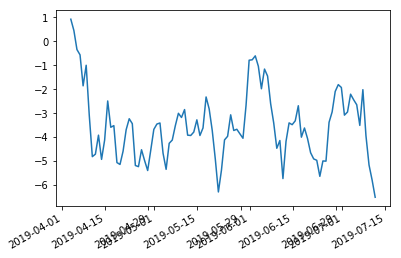

In [108]:
get_ipython().run_line_magic('matplotlib', 'inline')
ts = pd.Series(np.random.randn(100), index=pd.date_range('today', periods=100))
ts = ts.cumsum()
ts.plot()

####  DataFrame 折线图

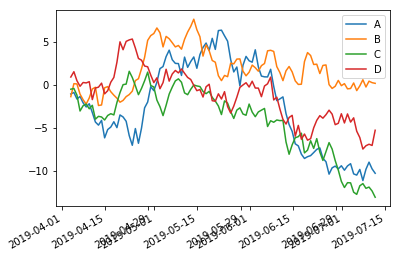

In [109]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

####  DataFrame 散点图

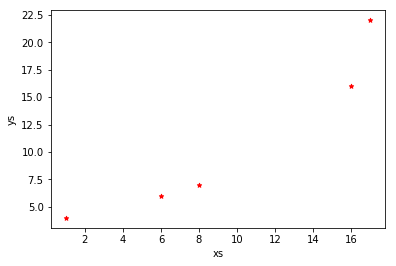

In [110]:
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})
df = df.cumsum()
df.plot.scatter("xs", "ys", color='red', marker="*")

####  DataFrame 柱形图

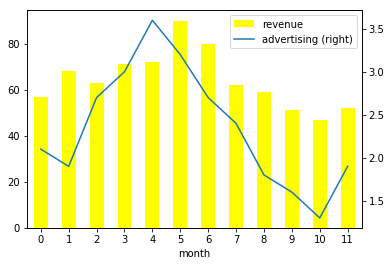

In [111]:
df = pd.DataFrame({"revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
                   "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
                   "month": range(12)
                   })

ax = df.plot.bar("month", "revenue", color="yellow")
df.plot("month", "advertising", secondary_y=True, ax=ax)